In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
OG_DF = pd.read_excel("Merged_UAE_ML.xlsx",sheet_name='Processed')


In [3]:
df_1 = OG_DF.copy()



### Aim : To get some underlying pattern for scorecard based on the top companies from different types 

## Food for thought : Use the model build on startup_us and check whether the success is according to sites?


In [4]:
df_1.describe().T


,count,mean,min,25%,50%,75%,max,std
Founded Date,13000,2016-10-13 01:11:46.707692288,2010-01-01 00:00:00,2014-01-01 00:00:00,2017-01-01 00:00:00,2020-01-01 00:00:00,2024-10-10 00:00:00,NaN
Last Funding Amount (in USD),1166.0,18958004.440823,1000.0,150000.0,1000000.0,3500000.0,3012770949.0,129911381.797818
Last Funding Date,1775,2021-04-26 01:43:50.535211264,2010-06-23 00:00:00,2019-10-01 00:00:00,2022-02-10 00:00:00,2023-06-14 00:00:00,2024-10-20 00:00:00,NaN
Number of Funding Rounds,1775.0,1.801127,1.0,1.0,1.0,2.0,11.0,1.331857
Total Funding Amount (in USD),1346.0,27956056.34101,1000.0,250000.0,1200000.0,4800000.0,3240000000.0,180679564.013879
Number of Articles,2119.0,11.917886,1.0,1.0,3.0,8.0,2563.0,84.306726


In [5]:
df_1.columns


Index(['Organization Name', 'Founded Date', 'Operating Status',
       'Headquarters Location', 'Number of Employees',
       'Last Funding Amount (in USD)', 'Last Funding Date', 'Founders',
       'Number of Funding Rounds', 'Funding Status', 'Last Funding Type',
       'Total Funding Amount (in USD)', 'Top 5 Investors',
       'Estimated Revenue Range', 'Number of Articles'],
      dtype='object')

In [ ]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              13000 non-null  object        
 1   Founded Date                   13000 non-null  datetime64[ns]
 2   Operating Status               13000 non-null  object        
 3   Headquarters Location          13000 non-null  object        
 4   Number of Employees            12477 non-null  object        
 5   Last Funding Amount (in USD)   1166 non-null   float64       
 6   Last Funding Date              1775 non-null   datetime64[ns]
 7   Founders                       4494 non-null   object        
 8   Number of Funding Rounds       1775 non-null   float64       
 9   Funding Status                 1576 non-null   object        
 10  Last Funding Type              1775 non-null   object        
 11  Total Funding A

## Checking how many data points we loose in terms of founding year 2010

In [8]:
df_filtered = df_1[df_1['Founded Date'] > "01-01-2010"]

df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 12999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              12668 non-null  object        
 1   Founded Date                   12668 non-null  datetime64[ns]
 2   Operating Status               12668 non-null  object        
 3   Headquarters Location          12668 non-null  object        
 4   Number of Employees            12158 non-null  object        
 5   Last Funding Amount (in USD)   1162 non-null   float64       
 6   Last Funding Date              1767 non-null   datetime64[ns]
 7   Founders                       4430 non-null   object        
 8   Number of Funding Rounds       1767 non-null   float64       
 9   Funding Status                 1563 non-null   object        
 10  Last Funding Type              1767 non-null   object        
 11  Total Funding Amount

In [20]:
total_date = df_1['Total Funding Amount (in USD)'].count()
filtered_data = df_filtered['Total Funding Amount (in USD)'].count()
print(f'\nTotal Datapoints before applying 2024 filter\n-------\n{total_date}\nTotal datapoints after applying filter\n-------\n{filtered_data}')



Total Datapoints before applying 2024 filter
-------
1346
Total datapoints after applying filter
-------
1342


In [ ]:
sns.histo


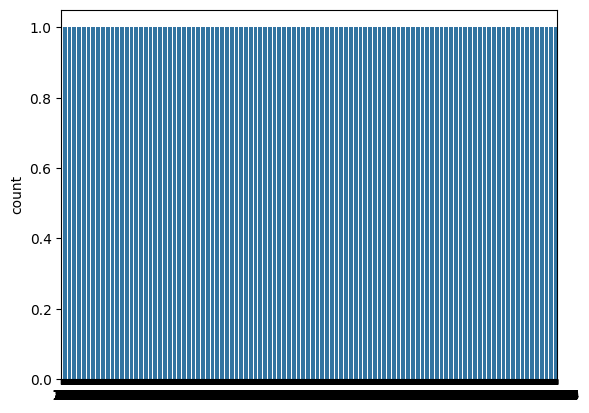

In [18]:
sns.countplot(OG_DF['Total Funding Amount (in USD)'])
plt.show()


In [ ]:
sns.countplot(df_filtered['Total Funding Amount (in USD)'])


In [ ]:
ax = sns.countplot(OG_DF['Total Funding Amount (in USD)'].count(),color='blue')

sns.countplot(data=df_filtered['Total Funding Amount (in USD)'].count(),ax=ax)
plt.show()


### reassigning df_1 to df_filtered 

In [ ]:
df_1 = df_filtered.copy()
"""
Think how this operation is happening in backend
"""


In [22]:
top_list = [
    'PISIQ','Careem','Kitopi','Opontia','Matic',
    'Group 42','Telegram Messenger','Vezeeta'
]

uae_startups = [
    "PISIQ", "Careem", "Kitopi", "Ziina", "Opontia", "Matic", "Group 42", "Telegram Messenger", 
    "Vezeeta", "Abu Dhabi National Oil Company", "RIZEK", "Property Finder", "Fetchr", "Souq", 
    "Foodics", "STARZ PLAY", "Shuaa Capital PSC", "TruKKer", "Pure Harvest Smart Farms", "Bayzat", 
    "Mamo Pay", "Mubadala", "Namshi", "Aster DM Healthcare", "The Luxury Closet", "Eyewa", "NymCard", 
    "SellAnyCar.com", "Sarwa.co", "Okadoc", "Phygicart", "Beehive", "HolidayMe", "Telr", "Foloosi", 
    "NOW Money", "Altibbi", "Channel VAS", "iKcon", "Floranow", "GrubTech", "Sehteq", "Sweetheart Kitchen", 
    "MUNCH:ON", "Seez", "Eat", "ARADA", "Souqalmal.com", "ADQ", "Emirates Global Aluminium", "Odiggo"
]



In [24]:
pd.set_option("display.width",500)


In [26]:
top_financials = df_filtered[df_filtered['Organization Name'].isin(uae_startups)].reset_index()
top_financials


,index,Organization Name,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding Amount (in USD),Top 5 Investors,Estimated Revenue Range,Number of Articles
0,1620,Opontia,2021-01-01,Active,"Dubai, Dubai, United Arab Emirates",51-100,25000000.0,2021-12-08,"Manfred Meyer, Philip Johnston",4.0,Early Stage Venture,Debt Financing,62000000.0,"Global Founders Capital, VentureSouq, Upper90,...",$10M to $50M,8.0
1,2008,Opontia,2021-01-01,Active,"Dubai, Dubai, United Arab Emirates",51-100,25000000.0,2021-12-08,"Manfred Meyer, Philip Johnston",4.0,Early Stage Venture,Debt Financing,62000000.0,"Global Founders Capital, VentureSouq, Upper90,...",$10M to $50M,8.0
2,2929,Ziina,2020-03-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,22000000.0,2024-09-04,"Andrew Gold, Faisal Toukan, Sarah Toukan",6.0,Early Stage Venture,Series A,30475000.0,"Y Combinator, Altos Ventures, FJ Labs, Long Jo...",$1M to $10M,7.0
3,3795,GrubTech,2019-10-03,Active,"Dubai, Dubai, United Arab Emirates",101-250,15000000.0,2024-05-28,"Mohamed Al Fayed, Mohamed Hamedi, Omar Rifai",5.0,Early Stage Venture,Series B,33400000.0,"Jahez International Company, Addition, BY Vent...",$10M to $50M,31.0
4,3898,Sweetheart Kitchen,2019-04-16,Active,"Dubai, Dubai, United Arab Emirates",101-250,17723813.0,2020-10-11,Peter Schatzberg,2.0,Late Stage Venture,Series C,40930489.0,Peter Schatzberg,$1M to $10M,31.0
5,3977,RIZEK,2019-01-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,10000000.0,2021-05-24,"Abdallah Abu-Sheikh, Ahmed Marzui",3.0,Early Stage Venture,Series A,15000000.0,"ADQ, E-tech investments, Peak Investments, Roz...",$1M to $10M,2.0
6,3988,iKcon,2019-01-01,Closed,"Dubai, Dubai, United Arab Emirates",501-1000,20000000.0,2021-03-28,"Kareem Abughazaleh, Khalid Baareh",2.0,M&A,Series A,25000000.0,"Derayah Venture Capital, Mohamed Yousuf Naghi ...",$100M to $500M,6.0
7,4003,NymCard,2018-01-01,Active,"Abu Dhabi, Abu Dhabi, United Arab Emirates",101-250,22500000.0,2022-06-08,"Ayman Chalhoub, Omar Onsi",8.0,Early Stage Venture,Series A,36100000.0,"FJ Labs, Endeavor Catalyst, Shorooq Partners, ...",$1M to $10M,40.0
8,4004,Okadoc,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",101-250,10000000.0,2022-11-10,Fodhil Benturquia,3.0,Early Stage Venture,Series B,22300000.0,"ADQ, iGan Partners, Abu Dhabi Investment Autho...",$10M to $50M,8.0
9,4008,Foloosi,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",1-10,2014592.0,2021-05-12,"Mohan Karuppiah, Omar Bin Brek",4.0,Seed,Seed,2524592.0,"Rashed Alfalasi, Mohammed Alsuwaidi",Less than $1M,17.0


In [30]:
top_financials= top_financials.drop_duplicates()


In [31]:
top_financials


,index,Organization Name,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding Amount (in USD),Top 5 Investors,Estimated Revenue Range,Number of Articles
0,1620,Opontia,2021-01-01,Active,"Dubai, Dubai, United Arab Emirates",51-100,25000000.0,2021-12-08,"Manfred Meyer, Philip Johnston",4.0,Early Stage Venture,Debt Financing,62000000.0,"Global Founders Capital, VentureSouq, Upper90,...",$10M to $50M,8.0
1,2008,Opontia,2021-01-01,Active,"Dubai, Dubai, United Arab Emirates",51-100,25000000.0,2021-12-08,"Manfred Meyer, Philip Johnston",4.0,Early Stage Venture,Debt Financing,62000000.0,"Global Founders Capital, VentureSouq, Upper90,...",$10M to $50M,8.0
2,2929,Ziina,2020-03-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,22000000.0,2024-09-04,"Andrew Gold, Faisal Toukan, Sarah Toukan",6.0,Early Stage Venture,Series A,30475000.0,"Y Combinator, Altos Ventures, FJ Labs, Long Jo...",$1M to $10M,7.0
3,3795,GrubTech,2019-10-03,Active,"Dubai, Dubai, United Arab Emirates",101-250,15000000.0,2024-05-28,"Mohamed Al Fayed, Mohamed Hamedi, Omar Rifai",5.0,Early Stage Venture,Series B,33400000.0,"Jahez International Company, Addition, BY Vent...",$10M to $50M,31.0
4,3898,Sweetheart Kitchen,2019-04-16,Active,"Dubai, Dubai, United Arab Emirates",101-250,17723813.0,2020-10-11,Peter Schatzberg,2.0,Late Stage Venture,Series C,40930489.0,Peter Schatzberg,$1M to $10M,31.0
5,3977,RIZEK,2019-01-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,10000000.0,2021-05-24,"Abdallah Abu-Sheikh, Ahmed Marzui",3.0,Early Stage Venture,Series A,15000000.0,"ADQ, E-tech investments, Peak Investments, Roz...",$1M to $10M,2.0
6,3988,iKcon,2019-01-01,Closed,"Dubai, Dubai, United Arab Emirates",501-1000,20000000.0,2021-03-28,"Kareem Abughazaleh, Khalid Baareh",2.0,M&A,Series A,25000000.0,"Derayah Venture Capital, Mohamed Yousuf Naghi ...",$100M to $500M,6.0
7,4003,NymCard,2018-01-01,Active,"Abu Dhabi, Abu Dhabi, United Arab Emirates",101-250,22500000.0,2022-06-08,"Ayman Chalhoub, Omar Onsi",8.0,Early Stage Venture,Series A,36100000.0,"FJ Labs, Endeavor Catalyst, Shorooq Partners, ...",$1M to $10M,40.0
8,4004,Okadoc,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",101-250,10000000.0,2022-11-10,Fodhil Benturquia,3.0,Early Stage Venture,Series B,22300000.0,"ADQ, iGan Partners, Abu Dhabi Investment Autho...",$10M to $50M,8.0
9,4008,Foloosi,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",1-10,2014592.0,2021-05-12,"Mohan Karuppiah, Omar Bin Brek",4.0,Seed,Seed,2524592.0,"Rashed Alfalasi, Mohammed Alsuwaidi",Less than $1M,17.0


## Removing the duplicate companies from the datset


In [34]:
top_financials = top_financials.drop_duplicates(subset=['Organization Name'])


In [35]:
top_financials


,index,Organization Name,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding Amount (in USD),Top 5 Investors,Estimated Revenue Range,Number of Articles
0,1620,Opontia,2021-01-01,Active,"Dubai, Dubai, United Arab Emirates",51-100,25000000.0,2021-12-08,"Manfred Meyer, Philip Johnston",4.0,Early Stage Venture,Debt Financing,62000000.0,"Global Founders Capital, VentureSouq, Upper90,...",$10M to $50M,8.0
2,2929,Ziina,2020-03-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,22000000.0,2024-09-04,"Andrew Gold, Faisal Toukan, Sarah Toukan",6.0,Early Stage Venture,Series A,30475000.0,"Y Combinator, Altos Ventures, FJ Labs, Long Jo...",$1M to $10M,7.0
3,3795,GrubTech,2019-10-03,Active,"Dubai, Dubai, United Arab Emirates",101-250,15000000.0,2024-05-28,"Mohamed Al Fayed, Mohamed Hamedi, Omar Rifai",5.0,Early Stage Venture,Series B,33400000.0,"Jahez International Company, Addition, BY Vent...",$10M to $50M,31.0
4,3898,Sweetheart Kitchen,2019-04-16,Active,"Dubai, Dubai, United Arab Emirates",101-250,17723813.0,2020-10-11,Peter Schatzberg,2.0,Late Stage Venture,Series C,40930489.0,Peter Schatzberg,$1M to $10M,31.0
5,3977,RIZEK,2019-01-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,10000000.0,2021-05-24,"Abdallah Abu-Sheikh, Ahmed Marzui",3.0,Early Stage Venture,Series A,15000000.0,"ADQ, E-tech investments, Peak Investments, Roz...",$1M to $10M,2.0
6,3988,iKcon,2019-01-01,Closed,"Dubai, Dubai, United Arab Emirates",501-1000,20000000.0,2021-03-28,"Kareem Abughazaleh, Khalid Baareh",2.0,M&A,Series A,25000000.0,"Derayah Venture Capital, Mohamed Yousuf Naghi ...",$100M to $500M,6.0
7,4003,NymCard,2018-01-01,Active,"Abu Dhabi, Abu Dhabi, United Arab Emirates",101-250,22500000.0,2022-06-08,"Ayman Chalhoub, Omar Onsi",8.0,Early Stage Venture,Series A,36100000.0,"FJ Labs, Endeavor Catalyst, Shorooq Partners, ...",$1M to $10M,40.0
8,4004,Okadoc,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",101-250,10000000.0,2022-11-10,Fodhil Benturquia,3.0,Early Stage Venture,Series B,22300000.0,"ADQ, iGan Partners, Abu Dhabi Investment Autho...",$10M to $50M,8.0
9,4008,Foloosi,2018-01-01,Active,"Dubai, Dubai, United Arab Emirates",1-10,2014592.0,2021-05-12,"Mohan Karuppiah, Omar Bin Brek",4.0,Seed,Seed,2524592.0,"Rashed Alfalasi, Mohammed Alsuwaidi",Less than $1M,17.0
10,4012,ADQ,2018-01-01,Active,"Abu Dhabi, Abu Dhabi, United Arab Emirates",251-500,NaN,NaT,H.E. Mohammed Hassan Alsuwaidi,NaN,NaN,NaN,NaN,NaN,$50M to $100M,133.0


### Transforming and Encoding the data 

In [37]:
num_col = top_financials.select_dtypes(exclude=['object']).columns.to_list()
cat_col = top_financials.select_dtypes(include="object").columns.to_list()

print(num_col)
print()
print(cat_col)


['index', 'Founded Date', 'Last Funding Amount (in USD)', 'Last Funding Date', 'Number of Funding Rounds', 'Total Funding Amount (in USD)', 'Number of Articles']

['Organization Name', 'Operating Status', 'Headquarters Location', 'Number of Employees', 'Founders', 'Funding Status', 'Last Funding Type', 'Top 5 Investors', 'Estimated Revenue Range']


In [38]:
top_financials = top_financials.drop(columns=['index'],axis=1)


In [41]:
top_financials.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Organization Name              30 non-null     object        
 1   Founded Date                   30 non-null     datetime64[ns]
 2   Operating Status               30 non-null     object        
 3   Headquarters Location          30 non-null     object        
 4   Number of Employees            30 non-null     object        
 5   Last Funding Amount (in USD)   21 non-null     float64       
 6   Last Funding Date              27 non-null     datetime64[ns]
 7   Founders                       28 non-null     object        
 8   Number of Funding Rounds       27 non-null     float64       
 9   Funding Status                 23 non-null     object        
 10  Last Funding Type              27 non-null     object        
 11  Total Funding Amount (in U

### Training the model for successful ones only in the data.

In [43]:
top_financials['Success_or_not'] = top_financials['Organization Name'].apply(
    lambda x: 1 if x in uae_startups else 0
)



In [ ]:
X = top_financials.drop(columns=['Succ'])


In [44]:
top_financials.to_csv("Successful_UAE_startup.csv",index=False)


In [46]:
df_2 = pd.read_csv("Successful_UAE_startup.csv")
